- DM project- Group 82
- Student: Diogo Pimenta nº 20230498 
- Student: Cláudia Beiral nº 20230387 
- Student: João Maia nº 20230746

***Demographic Clustering***

In [17]:
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [18]:
#show all columns
pd.set_option('display.max_columns', None)

In [19]:
df = pd.read_csv("XYZ_sports_dataset_preprocessed.csv", sep=";")
df.drop(columns=["RFM_Score_Labels"], inplace=True)
df

,ID,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,LastPeriodDuration,Recency,EnrollmentDuration_semesters,Monetary,Frequency,Gender,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,HasReferences,Dropout,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,10001,29,2630.000000,60,479.20,23.0,1,2.0,17.42,1,2,0,364,1568,2.33,205.665236,9.871245,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,2,5,125,8
1,10002,23,1980.000000,7,37.60,6.0,0,7.0,30.03,6,0,0,180,889,0.17,221.176471,35.294118,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,5,5,355,13
2,10003,9,0.000000,22,155.40,20.0,2,2.0,17.72,3,0,0,364,283,1.00,155.400000,20.000000,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,4,4,444,12
3,10004,35,4320.000000,210,373.20,41.0,0,7.0,60.97,0,3,0,180,721,4.33,86.189376,9.468822,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2,2,322,7
4,10005,24,2220.000000,3,140.00,28.0,0,7.0,59.01,26,0,0,365,1190,1.50,93.333333,18.666667,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,4,2,242,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14373,24937,14,0.000000,2,1460.45,112.0,96,4.0,34.84,8,3,0,183,2,6.50,224.684615,17.230769,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,4,5,545,14
14374,24938,39,2176.851113,38,343.85,57.0,0,7.0,60.97,3,0,0,181,1282,1.50,229.233333,38.000000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,2,5,5,255,12
14375,24939,20,1810.000000,2,43.60,6.0,0,7.0,30.03,8,0,0,180,946,0.17,256.470588,35.294118,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,5,5,355,13
14376,24940,55,4800.000000,3,788.60,185.0,155,3.0,15.87,7,2,0,183,3,3.50,225.314286,52.857143,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,5,5,555,15


In [20]:
df.columns

Index(['ID', 'Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfReferences', 'LastPeriodDuration', 'Recency',
       'EnrollmentDuration_semesters', 'Monetary', 'Frequency', 'Gender',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'DanceActivities', 'TeamActivities',
       'RacketActivities', 'CombatActivities', 'NatureActivities',
       'SpecialActivities', 'OtherActivities', 'HasReferences', 'Dropout',
       'R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score'],
      dtype='object')

In [21]:
#set id as index
df.set_index('ID', inplace=True)

c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The 

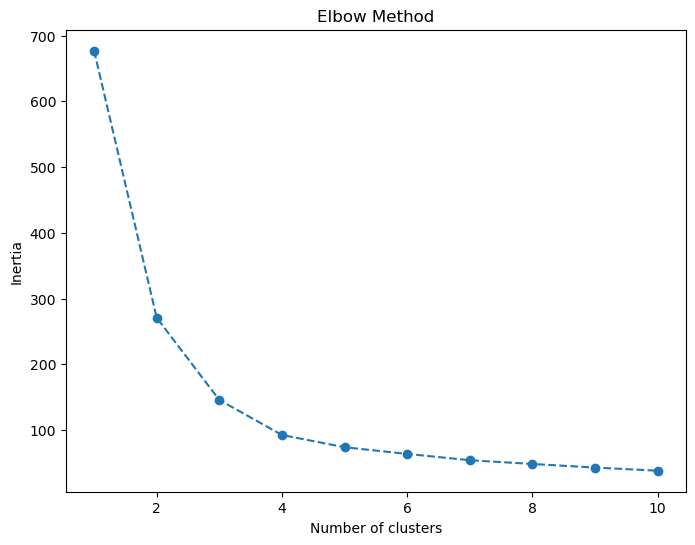

In [22]:
selected_columns = ['Income', 'Age']
cluster_data = df[selected_columns]

# Normalize the data (scaling)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Apply KMeans clustering with a range of cluster numbers
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


c:\Users\diogo\anaconda3\envs\environment_dm\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


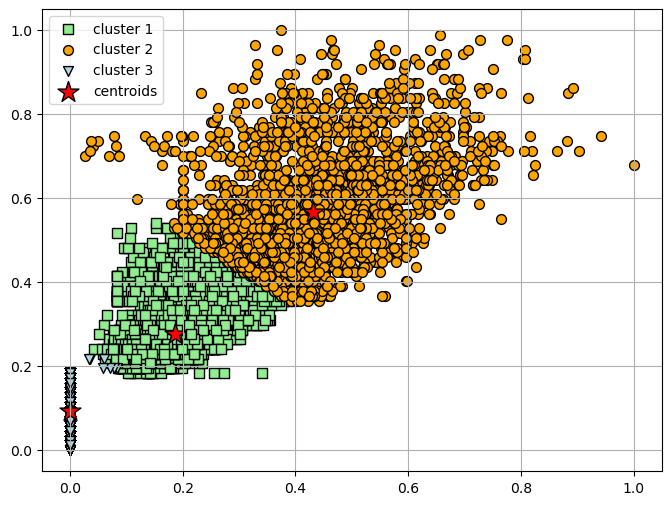

In [23]:
#apply the kmeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
y_pred = kmeans.predict(scaled_data)

#visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[y_pred == 0, 0], scaled_data[y_pred == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(scaled_data[y_pred == 1, 0], scaled_data[y_pred == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(scaled_data[y_pred == 2, 0], scaled_data[y_pred == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend()
plt.grid()
plt.show()


In [25]:
#See the amount of customers in each cluster
df['Cluster'] = y_pred

df['Cluster'].value_counts()


Cluster
0    9383
1    2606
2    2389
Name: count, dtype: int64

In [26]:
#Make a mean of the columns for each cluster
df.groupby('Cluster').mean()

,Age,Income,DaysWithoutFrequency,LifetimeValue,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,LastPeriodDuration,Recency,EnrollmentDuration_semesters,Monetary,Frequency,Gender,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,HasReferences,Dropout,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24.126612,2030.473918,88.225727,208.188023,34.740382,3.833529,6.474049,46.526092,5.373548,1.011190,0.005116,251.780561,862.482468,2.165228,114.536672,16.731998,0.396781,0.053075,0.005968,0.169349,0.708089,0.0,0.041565,0.024086,0.125759,0.0,0.014921,0.001918,0.004689,0.897581,2.748375,3.006714,2.603965,307.508579,8.359054
1,49.391404,4702.396957,78.460092,402.345695,62.697237,10.368381,6.023408,45.805602,6.211051,1.517652,0.018035,247.977744,644.620875,2.970384,148.841837,19.442130,0.389870,0.070223,0.011896,0.293937,0.620875,0.0,0.022256,0.016117,0.066002,0.0,0.090560,0.003837,0.016117,0.762855,3.305449,3.231005,3.410207,366.265157,9.946662
2,8.088740,1.912934,73.069067,615.151762,44.046044,36.696107,2.665550,21.757208,3.879029,1.893679,0.098786,253.243198,509.251151,3.581390,182.231773,11.898525,0.457095,0.003349,0.007953,0.776057,0.014650,0.0,0.146923,0.033487,0.087066,0.0,0.002930,0.000000,0.087066,0.626622,3.669318,2.649644,4.107158,397.535370,10.426120
